In [18]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [19]:
df=pd.read_csv("/content/1_boston_housing.csv")

In [20]:
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [21]:
df.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'MEDV'],
      dtype='object')

In [22]:
df.sample(5)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,MEDV
121,0.07165,0.0,25.65,0,0.581,6.004,84.1,2.1974,2,188,19.1,377.67,14.27,20.3
374,18.49820,0.0,18.10,0,0.668,4.138,100.0,1.1370,24,666,20.2,396.90,37.97,13.8
369,5.66998,0.0,18.10,1,0.631,6.683,96.8,1.3567,24,666,20.2,375.33,3.73,50.0
474,8.05579,0.0,18.10,0,0.584,5.427,95.4,2.4298,24,666,20.2,352.58,18.14,13.8
494,0.27957,0.0,9.69,0,0.585,5.926,42.6,2.3817,6,391,19.2,396.90,13.59,24.5


In [23]:
df.isnull().sum()

,0
crim,0
zn,0
indus,0
chas,0
nox,0
rm,0
age,0
dis,0
rad,0
tax,0


In [24]:
df.shape

(506, 14)

In [25]:
df.fillna(df.mean(),inplace=True)

In [26]:
df.isnull().sum()

,0
crim,0
zn,0
indus,0
chas,0
nox,0
rm,0
age,0
dis,0
rad,0
tax,0


<Axes: >

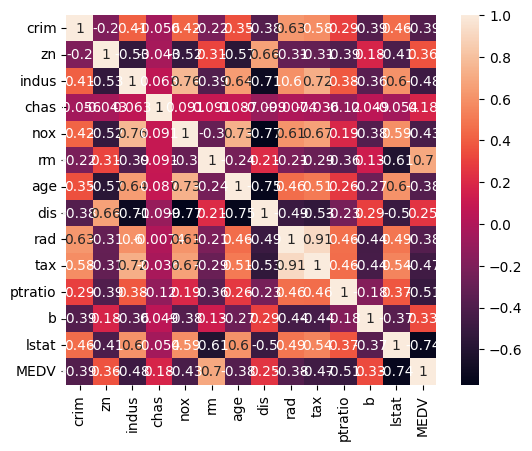

In [27]:
sns.heatmap(df.corr(),annot=True,square=True)

In [29]:
x=df.drop(['MEDV'],axis=1)
y=df['MEDV']

In [32]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=10)

In [34]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [35]:
x_train.shape,x_test.shape

((379, 13), (127, 13))

In [37]:
from keras.models import Sequential
from keras.layers import Dense

In [39]:
model=Sequential([
     Dense(128,activation='relu',input_shape=(13,)),
     Dense(64,activation='relu'),
     Dense(32,activation='relu'),
     Dense(16,activation='relu'),
     Dense(1)
])
model.compile(optimizer='adam',loss='mse',metrics=['mae'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 128)            │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,673 (49.50 KB)

 Trainable params: 12,673 (49.50 KB)

 Non-trainable params: 0 (0.00 B)

In [40]:
model.fit(x_train,y_train,epochs=50,batch_size=32,validation_split=0.05)

Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 565.5672 - mae: 22.0200 - val_loss: 688.5135 - val_mae: 23.5650
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 514.6331 - mae: 20.8836 - val_loss: 577.0842 - val_mae: 21.1950
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 362.5579 - mae: 17.0641 - val_loss: 348.7789 - val_mae: 15.5463
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 162.5831 - mae: 10.8975 - val_loss: 129.2237 - val_mae: 7.6772
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 64.1113 - mae: 6.3631 - val_loss: 119.1695 - val_mae: 6.7715
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 35.1591 - mae: 4.6248 - val_loss: 124.0237 - val_mae: 6.7358
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 25.1856 - mae: 3.7841 - val_loss: 104.3605 - val_mae: 6.1003
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 18.6572 - mae: 3.2008 - val_loss: 95.1911 - val_mae: 5.7236
Epoch 9/50
12/12 ━━━━━━━━━━━━━━━━━━━━

In [41]:
loss,mae=model.evaluate(x_test,y_test,verbose=0)
print(f"mean squared error",loss)
print(f"mean absolute error",mae)

mean squared error 17.167095184326172
mean absolute error 2.580681800842285


In [42]:
predictions=model.predict(x_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


In [46]:
from sklearn.metrics import mean_squared_error,r2_score
rmse=np.sqrt(mean_squared_error(y_test,predictions))
print("rmse:",rmse)


rmse: 4.143319400637711


In [47]:
r2=r2_score(y_test,predictions)
print(f"r2 score:",r2)

r2 score: 0.8277913561455116


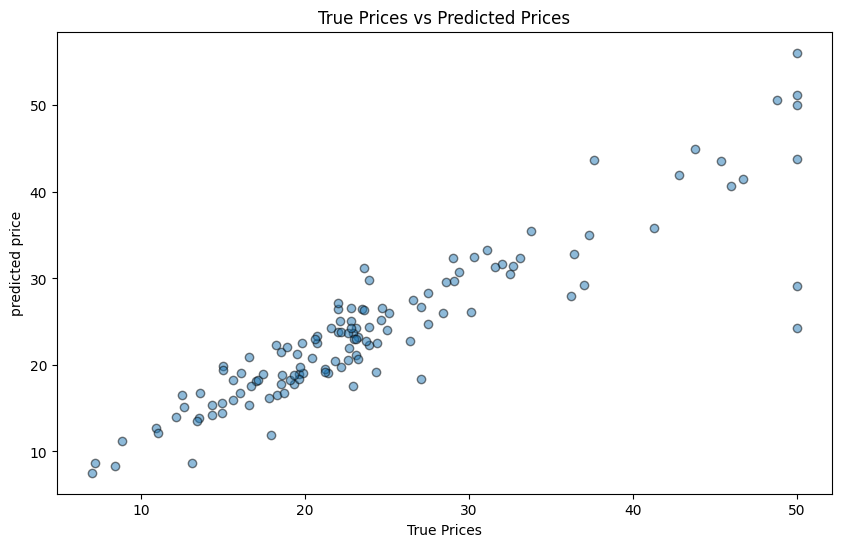

In [48]:
plt.figure(figsize=(10,6))
plt.scatter(y_test,predictions,alpha=0.5,edgecolor='k')
plt.xlabel("True Prices")
plt.ylabel("predicted price")
plt.title("True Prices vs Predicted Prices")
plt.show()